In [1]:
# Notebook Parameters
printstatements = 0

## Install Libraries

In [84]:
#pip install mlxtend

### Notes
https://blog.paperspace.com/dataloaders-abstractions-pytorch/

https://pytorch.org/docs/stable/notes/windows.html#usage-multiprocessing

## Main Code Sections

In [37]:
import numpy as np
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torch.utils.data import random_split
from mlxtend.preprocessing import standardize
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt

import csv
from collections import defaultdict

In [3]:
# Dataset Parameters
window_size = 0.2

In [138]:
# Bring in Dataset
apps = ['FB','Gmail','Instagram','Messenger','Skype','Viber','WhatsApp','Youtube']
dsetpath = './dataset'
apps = [name for name in os.listdir(dsetpath) if os.path.isdir(os.path.join(dsetpath,name))]
#actions = set([])
duplicates = defaultdict(lambda: 1)

print(apps)

data = np.empty((0,36))
app_action_label = np.empty(0)
app_action_label_count = -1
#app_label = np.empty(0)
actions = []
action_label = []

removed_for_test_data = []
removed_for_test_labels = []

sum_lines = 0

for a in apps:
    apppath = dsetpath+'/'+a
    for folder in os.listdir(apppath):
        if os.path.isdir(os.path.join(apppath,folder)):
#             if folder in actions:
#                 duplicates[folder] += 1
#             else:
#                 actions += folder
            if (folder not in actions):
                actions.append(folder)
            app_action_label_count+=1
            #actions.add(folder)
            #print(os.listdir(apppath+'/'+folder))
            csv_file_names = [apppath+'/'+folder+'/'+a for a in os.listdir(apppath+'/'+folder)]
            for csv_data in csv_file_names:
                print(csv_data)
                with open(csv_data) as csv_file:
                    csv_reader = csv.reader(csv_file, delimiter=',')
                    line_count = 0
                    frame_delta_data_sd = np.empty(0)
                    frame_len_data_sd = np.empty(0)
                    frame_delta_data_ds = np.empty(0)
                    frame_len_data_ds = np.empty(0)
                    curr_window = np.empty(0)
                    window_data = np.empty(0)
                    for row in csv_reader:
                        if line_count == 1:
                            frame_time_relative = float(row[1])
                            frame_len = float(row[-1])
                            frame_time_delta_displayed = float(row[-2])
                            isa = row[2]
                            ida = row[3]
                            frame_delta_data_sd = np.append(frame_delta_data_sd,frame_time_delta_displayed)
                            frame_len_data_sd = np.append(frame_len_data_ds,frame_len)
                            curr_window = np.append(curr_window, frame_time_relative)
                            window_data = np.append(window_data, isa)
                        if line_count > 1:
                            frame_time_relative = float(row[1])
                            sa = row[2]
                            da = row[3]
                            frame_len = float(row[-1])
                            frame_time_delta_displayed = float(row[-2])
                            
                            
                            if (len(curr_window) > 0 and frame_time_relative-curr_window[0] > 0.2):
                                sample = []
                                if (len(frame_delta_data_sd) == 0):    
                                    sample += [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                                else:
                                    sample.append(np.mean(frame_delta_data_sd))
                                    sample.append(np.median(frame_delta_data_sd))
                                    sample.append(np.std(frame_delta_data_sd))
                                    sample.append(np.min(frame_delta_data_sd))
                                    sample.append(np.max(frame_delta_data_sd))
                                    sample.append(np.quantile(frame_delta_data_sd,.25))
                                    sample.append(np.quantile(frame_delta_data_sd,.75))
                                    sample.append(np.sum(frame_delta_data_sd))
                                    sample.append(np.var(frame_delta_data_sd))
                                    #sample.append(skew(frame_delta_data_sd))
                                    #sample.append(kurtosis(frame_delta_data_sd))

                                    sample.append(np.mean(frame_len_data_sd))
                                    sample.append(np.median(frame_len_data_sd))
                                    sample.append(np.std(frame_len_data_sd))
                                    sample.append(np.min(frame_len_data_sd))
                                    sample.append(np.max(frame_len_data_sd))
                                    sample.append(np.quantile(frame_len_data_sd,.25))
                                    sample.append(np.quantile(frame_len_data_sd,.75))
                                    sample.append(np.sum(frame_len_data_sd))
                                    sample.append(np.var(frame_len_data_sd))
                                    #sample.append(skew(frame_len_data_sd))
                                    #sample.append(kurtosis(frame_len_data_sd))
                                    
                                if (len(frame_delta_data_ds) == 0):    
                                    sample += [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                                else:
                                    sample.append(np.mean(frame_delta_data_ds))
                                    sample.append(np.median(frame_delta_data_ds))
                                    sample.append(np.std(frame_delta_data_ds))
                                    sample.append(np.min(frame_delta_data_ds))
                                    sample.append(np.max(frame_delta_data_ds))
                                    sample.append(np.quantile(frame_delta_data_ds,.25))
                                    sample.append(np.quantile(frame_delta_data_ds,.75))
                                    sample.append(np.sum(frame_delta_data_ds))
                                    sample.append(np.var(frame_delta_data_ds))
                                    #sample.append(skew(frame_delta_data_ds))
                                    #sample.append(kurtosis(frame_delta_data_ds))


                                    sample.append(np.mean(frame_len_data_ds))
                                    sample.append(np.median(frame_len_data_ds))
                                    sample.append(np.std(frame_len_data_ds))
                                    sample.append(np.min(frame_len_data_ds))
                                    sample.append(np.max(frame_len_data_ds))
                                    sample.append(np.quantile(frame_len_data_ds,.25))
                                    sample.append(np.quantile(frame_len_data_ds,.75))
                                    sample.append(np.sum(frame_len_data_ds))
                                    sample.append(np.var(frame_len_data_ds))
                                    #sample.append(skew(frame_len_data_ds))
                                    #sample.append(kurtosis(frame_len_data_ds))

                                if (a == "WhatsApp" and folder == "Send video"):
                                    removed_for_test_data.append([np.asarray(sample.copy())])
                                    removed_for_test_labels.append(actions.index(folder))
                                else:
                                    data = np.append(data, [np.asarray(sample.copy())], axis=0)
                                    #action_label = np.append(action_label,np.where(actions == folder)[0])
                                    app_action_label = np.append(app_action_label,app_action_label_count)
                                    action_label.append(actions.index(folder))
                                    app_label = np.append(app_label, apps.index(a))

                               
                                while (len(curr_window) > 0 and frame_time_relative-curr_window[0] > 0.2):
                                    curr_window = np.delete(curr_window,0)
                                    if (window_data[0] == isa):
                                        frame_delta_data_sd = np.delete(frame_delta_data_sd,0)
                                        frame_len_data_sd = np.delete(frame_len_data_sd,0)
                                        window_data = np.delete(window_data,0)
                                    elif (window_data[0] == ida):
                                        frame_delta_data_ds = np.delete(frame_delta_data_ds,0)
                                        frame_len_data_ds = np.delete(frame_len_data_ds,0)
                                        window_data = np.delete(window_data,0)
                                    assert len(window_data) == len(frame_delta_data_ds) + len(frame_delta_data_sd), "{} {} {}".format(len(window_data), len(frame_delta_data_ds), len(frame_delta_data_sd))
                                    
                            
                            if (sa == isa):
                                curr_window = np.append(curr_window, frame_time_relative)
                                window_data = np.append(window_data, sa)
                                frame_delta_data_sd = np.append(frame_delta_data_sd,frame_time_delta_displayed)
                                frame_len_data_sd = np.append(frame_len_data_sd,frame_len)
                                
                            elif (sa == ida):
                                curr_window = np.append(curr_window, frame_time_relative)
                                window_data = np.append(window_data, sa)
                                frame_delta_data_ds = np.append(frame_delta_data_ds,frame_time_delta_displayed)
                                frame_len_data_ds = np.append(frame_len_data_ds,frame_len)

                            
                            #else:
                                #print(line_count)
                                #print("sa {} | isa {} | da {} | ida {}".format(sa, isa, da, ida))
                                #raise Exception("Source and Destination doesn't match in file {}".format(csv_data))
                                #data = np.append(data,[np.asarray(row.copy())], axis=0)
                        line_count += 1
                    #print(f'Processed {line_count} lines.')
                    sum_lines += line_count



['FB', 'Gmail', 'Instagram', 'Messenger', 'Skype', 'Viber', 'WhatsApp', 'YouTube']
./dataset/FB/Add story-image/Fbsti1.csv
./dataset/FB/Add story-image/Fbsti2.csv
./dataset/FB/Add story-image/Fbsti3.csv
./dataset/FB/Add story-image/Fbsti4.csv
./dataset/FB/Add story-text/Fbstt1.csv
./dataset/FB/Add story-text/Fbstt2.csv
./dataset/FB/Add story-text/Fbstt3.csv
./dataset/FB/Add story-text/Fbstt4.csv
./dataset/FB/Add story-video/Fbstv1.csv
./dataset/FB/Add story-video/Fbstv2.csv
./dataset/FB/Add story-video/Fbstv3.csv
./dataset/FB/Add story-video/Fbstv4.csv
./dataset/FB/Comment a post-image/Fbci1.csv
./dataset/FB/Comment a post-image/Fbci2.csv
./dataset/FB/Comment a post-image/Fbci3.csv
./dataset/FB/Comment a post-image/Fbci4.csv
./dataset/FB/Comment a post-long text/Fbctl1.csv
./dataset/FB/Comment a post-long text/Fbctl2.csv
./dataset/FB/Comment a post-long text/Fbctl4.csv
./dataset/FB/Comment a post-long text/Fbctl5.csv
./dataset/FB/Comment a post-short text/Fbcts11.csv
./dataset/FB/Comme

./dataset/Instagram/Watch video/Inlwv3.csv
./dataset/Instagram/Watch video/Inlwv4.csv
./dataset/Instagram/Watch video/Inlwv5.csv
./dataset/Messenger/Audio call/Msgac1.csv
./dataset/Messenger/Audio call/Msgac2.csv
./dataset/Messenger/Audio call/Msgac3.csv
./dataset/Messenger/Audio call/Msgac4.csv
./dataset/Messenger/Long message/Msglm1.csv
./dataset/Messenger/Long message/Msglm2.csv
./dataset/Messenger/Long message/Msglm3.csv
./dataset/Messenger/Long message/Msglm4.csv
./dataset/Messenger/Send image/Msgi1.csv
./dataset/Messenger/Send image/Msgi2.csv
./dataset/Messenger/Send image/Msgi3.csv
./dataset/Messenger/Send image/Msgi4.csv
./dataset/Messenger/Send recording/Msgr1.csv
./dataset/Messenger/Send recording/Msgr2.csv
./dataset/Messenger/Send recording/Msgr3.csv
./dataset/Messenger/Send recording/Msgr4.csv
./dataset/Messenger/Send video/Msgv1.csv
./dataset/Messenger/Send video/Msgv2.csv
./dataset/Messenger/Send video/Msgv3.csv
./dataset/Messenger/Send video/Msgv4.csv
./dataset/Messenger

In [140]:
print(len(data))
print(len(actions))
print(app_action_label[20000])
len(removed_for_test_labels)

56365
61
47.0


855

In [115]:
print([name for name in os.listdir("./dataset") if os.path.isdir(os.path.join('./dataset',name))])

['FB', 'Gmail', 'Instagram', 'Messenger', 'Skype', 'Viber', 'WhatsApp', 'YouTube']


In [141]:
class networkDataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, data, label):
        'Initialization'
        self.labels = label
        self.samples = data

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.samples)

  def __getitem__(self, index):
        'Generates one sample of data'
        return self.samples[index], self.labels[index]

In [142]:
device = "cpu"


# Define model
class NetworkNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.architecture = nn.Sequential(
            nn.Linear(36, 128, dtype=torch.float64),
            nn.Dropout(p=0.3),
            nn.LeakyReLU(),
            nn.Linear(128, 256, dtype=torch.float64),
            nn.Dropout(p=0.3),
            nn.LeakyReLU(),
            nn.Linear(256, 512, dtype=torch.float64),
            nn.Dropout(p=0.3),
            nn.LeakyReLU(),
            nn.Linear(512, 1024, dtype=torch.float64),
            nn.Dropout(p=0.3),
            nn.LeakyReLU(),
            nn.Linear(1024,61, dtype=torch.float64),
            nn.Dropout(p=0.3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        logits = self.architecture(x)
        return logits

def train_model(dataloader, model, loss_fn, optimizer):
    print("Entered Train Model")
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

#         if batch % 100 == 0:
#             loss, current = loss.item(), (batch + 1) * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    training_acc.append(loss)

def test_model(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")  
    valid_acc.append((100*correct))

In [143]:
standarized_data = standardize(data, columns=range(data.shape[1]))
# with open('std_data.npy', 'wb') as f:
#     np.save(f, standarized_data)
# with open('action_label.npy', 'wb') as f:
#     np.save(f, action_label)

In [20]:
# standarized_data = np.load('std_data.npy')
# action_label = np.load('action_label.npy')

In [125]:
standarized_data[0]
print(len(action_label))

57220


In [24]:
torch.set_default_dtype(torch.float32)

In [120]:
# https://discuss.pytorch.org/t/balanced-sampling-between-classes-with-torchvision-dataloader/2703/2
def make_weights_for_balanced_classes(images, nclasses):                        
    count = [0] * nclasses                                                      
    for item in images:                                                         
        count[item] += 1                                                     
    weight_per_class = [0.] * nclasses                                      
    N = float(sum(count))                                                   
    for i in range(nclasses):   
        weight_per_class[i] = N/max(1,float(count[i]))                              
    weight = [0] * len(images)                                              
    for idx, val in enumerate(images):                                          
        weight[idx] = weight_per_class[val]                                  
    return weight  

In [146]:
# Parameters
training_acc = []
valid_acc = []

model = NetworkNeuralNetwork().to(device)
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.7e-3)

params = {'batch_size': 128,
          'shuffle': True,
          'num_workers': 0}
max_epochs = 100

sd = torch.from_numpy(standarized_data)
#print(action_label.dtype)
# Datasets
dataset = networkDataset(standarized_data, torch.from_numpy(np.asarray(action_label)).type(torch.LongTensor))

size = len(action_label)
print(size*8//10)
train, validation, test = random_split(dataset, [.8, .1, .1])

#training_weights = make_weights_for_balanced_classes(train[:][1], 92)
#training_weights = torch.DoubleTensor(training_weights)                                       
#sampler = torch.utils.data.sampler.WeightedRandomSampler(training_weights, len(training_weights)) 

#Generators
training_set = networkDataset(train[:][0], train[:][1])
training_generator = torch.utils.data.DataLoader(training_set, **params)
#training_generator = torch.utils.data.DataLoader(training_set, sampler = sampler, **params)

validation_set = networkDataset(validation[:][0], validation[:][1])
validation_generator = torch.utils.data.DataLoader(validation_set, **params)

test_set = networkDataset(test[:][0], test[:][1])
test_generator = torch.utils.data.DataLoader(validation_set, **params)


# Loop over epochs
for epoch in range(max_epochs):
    # Training
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_model(training_generator, model, loss_fn, optimizer)
    test_model(validation_generator, model, loss_fn)
    

NetworkNeuralNetwork(
  (architecture): Sequential(
    (0): Linear(in_features=36, out_features=128, bias=True)
    (1): Dropout(p=0.3, inplace=False)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=128, out_features=256, bias=True)
    (4): Dropout(p=0.3, inplace=False)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=256, out_features=512, bias=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Linear(in_features=512, out_features=1024, bias=True)
    (10): Dropout(p=0.3, inplace=False)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Linear(in_features=1024, out_features=61, bias=True)
    (13): Dropout(p=0.3, inplace=False)
    (14): Softmax(dim=1)
  )
)
45092
Epoch 1
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 63.4%, Avg loss: 3.508070 

Epoch 2
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 63.5%, Avg loss: 3.501363 

Epoch 3
----------

Test Error: 
 Accuracy: 75.4%, Avg loss: 3.384867 

Epoch 68
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 74.7%, Avg loss: 3.396960 

Epoch 69
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 74.5%, Avg loss: 3.387972 

Epoch 70
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 76.5%, Avg loss: 3.384771 

Epoch 71
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 76.5%, Avg loss: 3.374415 

Epoch 72
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 72.4%, Avg loss: 3.408841 

Epoch 73
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 73.4%, Avg loss: 3.404276 

Epoch 74
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 75.1%, Avg loss: 3.392511 

Epoch 75
-------------------------------
Entered Train Model
Test Error: 
 Accuracy: 76.4%, Avg loss: 3.369529 

Epoch 76
-------------------------------
Ent

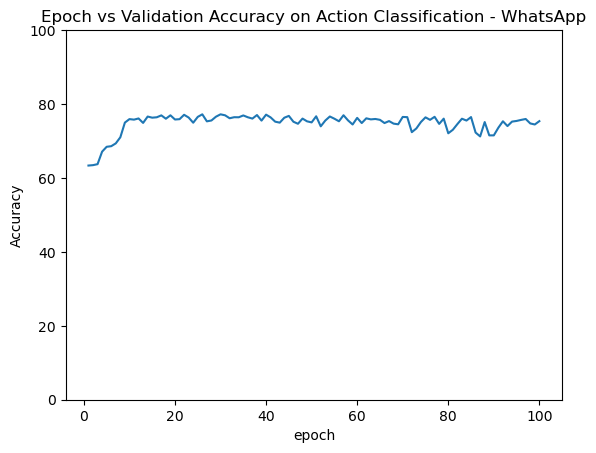

In [147]:
plt.figure(1)
plt.plot(range(1,len(valid_acc)+1), valid_acc)
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.ylim([0,100])
plt.title("Epoch vs Validation Accuracy on Action Classification - WhatsApp")
plt.savefig('action_class-whatsapp.png', format="png")
plt.show()

In [177]:
test_model(test_generator, model, loss_fn)
np.asarray([i[0] for i in removed_for_test_data]).shape

Test Error: 
 Accuracy: 75.4%, Avg loss: 3.379577 



(855, 36)

In [215]:
def test_model_unseen(dataloader, model, loss_fn):
    wrongs = []
    counts = defaultdict(int)
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            if (pred.argmax(1) != y).type(torch.float).sum().item():
                for i in pred.argmax(1):
                    if (i != 26):
                        counts[actions[i]] += 1
                        if i not in wrongs:
                            wrongs.append(i)
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")  
    valid_acc.append((100*correct))
    return counts, wrongs

In [218]:
unwrap = np.asarray([i[0] for i in removed_for_test_data])
standarized_removed_for_test_data = standardize(unwrap, columns=range(unwrap.shape[1]))
extrapolate_set = networkDataset(standarized_removed_for_test_data, removed_for_test_labels)
extrapolate_generator = torch.utils.data.DataLoader(extrapolate_set, **params)

counts, wrongs = test_model_unseen(extrapolate_generator, model, loss_fn)

print(len(unwrap))
for i in wrongs:
    print(f"{actions[i]}: {counts[actions[i]]}")



Test Error: 
 Accuracy: 0.6%, Avg loss: 4.133040 

855
Upload video: 426
Audio call: 104
Direct - video chat: 309
Post a video: 10
Video call: 1


In [198]:
actions[31]

'Direct - video chat'

In [104]:
#pred_grid = np.zeros((62,62))
with torch.no_grad():
    for X, y in test_generator:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        print(pred[:][60])
        print(pred.argmax(1))
        #pred_grid[ypred] += 1
        break


tensor([ 1.3804e-68,  6.4470e-68,  6.5748e-66,  9.0640e-71,  9.0086e-68,
         5.4565e-69,  5.9495e-69,  2.6640e-69,  2.5363e-70,  4.4939e-70,
         2.2266e-38,  1.5851e-69,  1.6277e-68,  1.6861e-69,  6.4079e-67,
         6.5963e-70,  6.9425e-67,  4.4177e-69,  1.6566e-70,  3.1130e-69,
         1.1560e-69, 1.1125e-183,  9.4562e-69,  2.8576e-67,  1.1544e-69,
         3.2164e-70,  7.7823e-30,  9.0839e-70,  3.5896e-70,  9.1797e-70,
         3.6030e-70, 1.0612e-153,  6.8164e-69,  2.3021e-72,  3.1034e-68,
        1.5631e-172,  2.8325e-71,  2.4642e-69, 8.2833e-118,  1.2227e-69,
         5.6017e-68,  7.8162e-68,  5.5902e-71,  1.4059e-67,  5.8299e-67,
         1.0000e+00, 2.2982e-126,  3.3677e-69,  1.5631e-70,  1.1190e-69,
         3.1246e-69,  3.0616e-69,  1.1931e-68,  1.1385e-60,  4.8927e-69,
         1.5359e-69,  2.7020e-69,  1.6481e-68,  2.2770e-70,  4.1907e-69,
        1.4157e-136,  3.5250e-69,  6.7414e-70,  9.0777e-70,  2.1086e-69,
         1.7030e-71,  2.8338e-69,  1.7507e-68,  3.8

In [127]:
for i in range(action_label_count):
    print(np.ptp(np.where(action_label == i)))

370
245
243
135
123
94
79
39
24
16
1182
127
79
98
136
83
382
12
33
22
42
94
87
97
19
29
7387
95
80
42
39
34
25
33
71
20
3101
40
7
13
14
8
24
4732
25
51
54
519
57
30
63
248
18
64
64
597
2707
2098
854
190
77
99
56
1113
1546
531
25
74
51
173
19
1836
73
1475
292
19
28
107
12
24
8
854
1306
66
21
13
11
6
11
9
17922


In [119]:
action_label

array([ 0.,  0.,  0., ..., 91., 91., 91.])